# Data Import and Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('fbref21.csv')
df.shape

(1807, 29)

In [3]:
df.head()

,Rk,Player,Nation,Pos,Pos 1,Squad,Comp,Age,Born,Gls,...,SCA90,GCA90,Tkl/90,TklW/90,Tmid3/90,Tattm/90,Passb/90,TklInt/90,Attpen/90,Pro/90
0,1.0,Max Aarons,eng ENG,DF,NaN,Norwich City,eng Premier League,21.0,2000.0,0.0,...,2.67,0.33,2.33,1.67,1.00,0.00,3.00,4.00,1.00,1.00
1,2.0,Yunis Abdelhamid,ma MAR,DF,NaN,Reims,fr Ligue 1,33.0,1987.0,0.0,...,0.50,0.00,2.00,2.00,0.50,0.00,1.00,5.75,2.50,0.50
2,3.0,Salis Abdul Samed,gh GHA,MF,NaN,Clermont Foot,fr Ligue 1,21.0,2000.0,0.0,...,0.43,0.00,1.30,0.87,0.87,0.00,0.43,3.04,0.43,0.87
3,4.0,Laurent Abergel,fr FRA,MF,NaN,Lorient,fr Ligue 1,28.0,1993.0,0.0,...,2.25,0.25,3.50,2.00,1.50,0.25,1.75,6.00,0.25,1.50
4,5.0,Charles Abi,fr FRA,FW,NaN,Saint-Ãtienne,fr Ligue 1,21.0,2000.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,6.00,0.00


In [4]:
df.fillna(0, inplace=True)


In [5]:
df = df[df.iloc[:, 2:4].apply(lambda x: 'MF' in x.values, axis=1)]
df['Nation'] = df['Nation'].str[2:]
df['Comp'] = df['Comp'].str.split().str.get(1)

df.shape

(605, 29)

# Principle Component Analysis

In [6]:
x = df.iloc[:, 7:]
x.columns.tolist()

['Age',
 'Born',
 'Gls',
 'Ast',
 'npxG',
 'xA',
 'Sh/90',
 'SoT/90',
 'Cmp%',
 'PrgDist/90',
 'TB/90',
 'SW/90',
 'SCA90',
 'GCA90',
 'Tkl/90',
 'TklW/90',
 'Tmid3/90',
 'Tattm/90',
 'Passb/90',
 'TklInt/90',
 'Attpen/90',
 'Pro/90']

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [9]:
pca = PCA(n_components = 2)
principle = pca.fit_transform(x)

In [10]:
pca.explained_variance_ratio_.sum()

0.32950601389906753

In [11]:
ss = pd.DataFrame(data = principle, columns = ['PC1', 'PC2'])
ss

,PC1,PC2
0,0.113824,-1.160963
1,0.406707,1.690809
2,0.783046,-0.620410
3,0.121564,-0.381696
4,2.948456,-0.495931
...,...,...
600,-0.903313,-2.326637
601,-1.245434,-1.410752
602,1.335480,-0.622554
603,0.994326,-0.125624


In [12]:
df = df.reset_index(drop=True)


In [13]:
merged_df = ss.merge(df, left_index=True, right_index=True)
merged_df

,PC1,PC2,Rk,Player,Nation,Pos,Pos 1,Squad,Comp,Age,...,SCA90,GCA90,Tkl/90,TklW/90,Tmid3/90,Tattm/90,Passb/90,TklInt/90,Attpen/90,Pro/90
0,0.113824,-1.160963,3.0,Salis Abdul Samed,GHA,MF,0,Clermont Foot,Ligue,21.0,...,0.43,0.00,1.30,0.87,0.87,0.00,0.43,3.04,0.43,0.87
1,0.406707,1.690809,4.0,Laurent Abergel,FRA,MF,0,Lorient,Ligue,28.0,...,2.25,0.25,3.50,2.00,1.50,0.25,1.75,6.00,0.25,1.50
2,0.783046,-0.620410,14.0,Tyler Adams,USA,MF,0,RB Leipzig,Bundesliga,22.0,...,1.89,0.00,1.92,1.92,1.15,0.38,2.31,4.23,0.77,1.15
3,0.121564,-0.381696,17.0,Yacine Adli,FRA,MF,FW,Bordeaux,Ligue,21.0,...,3.05,0.00,2.31,2.31,0.77,0.00,0.00,3.85,0.77,0.77
4,2.948456,-0.495931,23.0,Jean-Eudes Aholou,CIV,MF,0,Strasbourg,Ligue,27.0,...,0.00,0.00,4.00,4.00,2.00,0.00,2.00,10.00,0.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,-0.903313,-2.326637,1842.0,Luca Zidane,FRA,MF,GK,Rayo Vallecano,La,23.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
601,-1.245434,-1.410752,1843.0,Piotr ZieliÅski,POL,MF,0,Napoli,Serie,27.0,...,7.94,0.00,0.00,0.00,0.00,0.00,2.50,0.00,0.00,0.00
602,1.335480,-0.622554,1850.0,MartÃ­n Zubimendi,ESP,MF,0,Real Sociedad,La,22.0,...,0.67,0.00,3.33,1.67,2.00,0.33,0.33,3.67,0.33,2.00
603,0.994326,-0.125624,1851.0,Szymon Å»urkowski,POL,MF,FW,Empoli,Serie,23.0,...,3.46,0.00,3.33,3.33,0.00,0.00,0.00,10.00,0.00,0.00


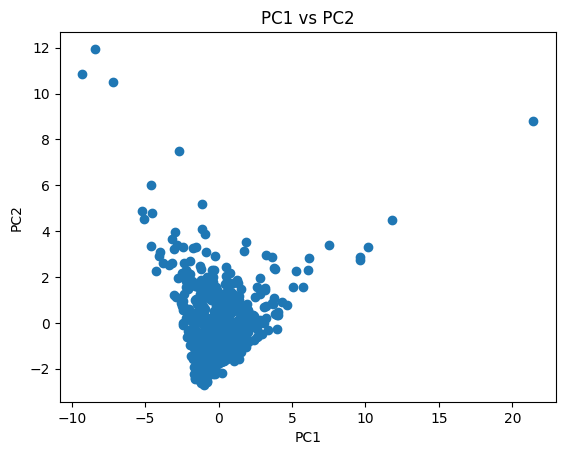

In [14]:
import matplotlib.pyplot as plt

plt.scatter(merged_df['PC1'], merged_df['PC2'])

plt.title('PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

# K-Mean Clustering

C:\Users\SINGER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SINGER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SINGER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SINGER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

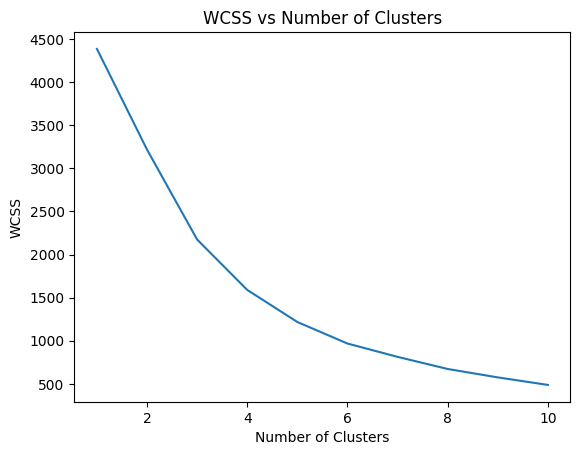

In [15]:
data = merged_df[['PC1', 'PC2']]

from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter = 600, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
data = merged_df[['PC1', 'PC2']]

k = 5    
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(data)

merged_df['Cluster'] = kmeans.labels_

merged_df

C:\Users\SINGER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,PC1,PC2,Rk,Player,Nation,Pos,Pos 1,Squad,Comp,Age,...,GCA90,Tkl/90,TklW/90,Tmid3/90,Tattm/90,Passb/90,TklInt/90,Attpen/90,Pro/90,Cluster
0,0.113824,-1.160963,3.0,Salis Abdul Samed,GHA,MF,0,Clermont Foot,Ligue,21.0,...,0.00,1.30,0.87,0.87,0.00,0.43,3.04,0.43,0.87,0
1,0.406707,1.690809,4.0,Laurent Abergel,FRA,MF,0,Lorient,Ligue,28.0,...,0.25,3.50,2.00,1.50,0.25,1.75,6.00,0.25,1.50,2
2,0.783046,-0.620410,14.0,Tyler Adams,USA,MF,0,RB Leipzig,Bundesliga,22.0,...,0.00,1.92,1.92,1.15,0.38,2.31,4.23,0.77,1.15,0
3,0.121564,-0.381696,17.0,Yacine Adli,FRA,MF,FW,Bordeaux,Ligue,21.0,...,0.00,2.31,2.31,0.77,0.00,0.00,3.85,0.77,0.77,0
4,2.948456,-0.495931,23.0,Jean-Eudes Aholou,CIV,MF,0,Strasbourg,Ligue,27.0,...,0.00,4.00,4.00,2.00,0.00,2.00,10.00,0.00,2.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,-0.903313,-2.326637,1842.0,Luca Zidane,FRA,MF,GK,Rayo Vallecano,La,23.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
601,-1.245434,-1.410752,1843.0,Piotr ZieliÅski,POL,MF,0,Napoli,Serie,27.0,...,0.00,0.00,0.00,0.00,0.00,2.50,0.00,0.00,0.00,0
602,1.335480,-0.622554,1850.0,MartÃ­n Zubimendi,ESP,MF,0,Real Sociedad,La,22.0,...,0.00,3.33,1.67,2.00,0.33,0.33,3.67,0.33,2.00,2
603,0.994326,-0.125624,1851.0,Szymon Å»urkowski,POL,MF,FW,Empoli,Serie,23.0,...,0.00,3.33,3.33,0.00,0.00,0.00,10.00,0.00,0.00,2


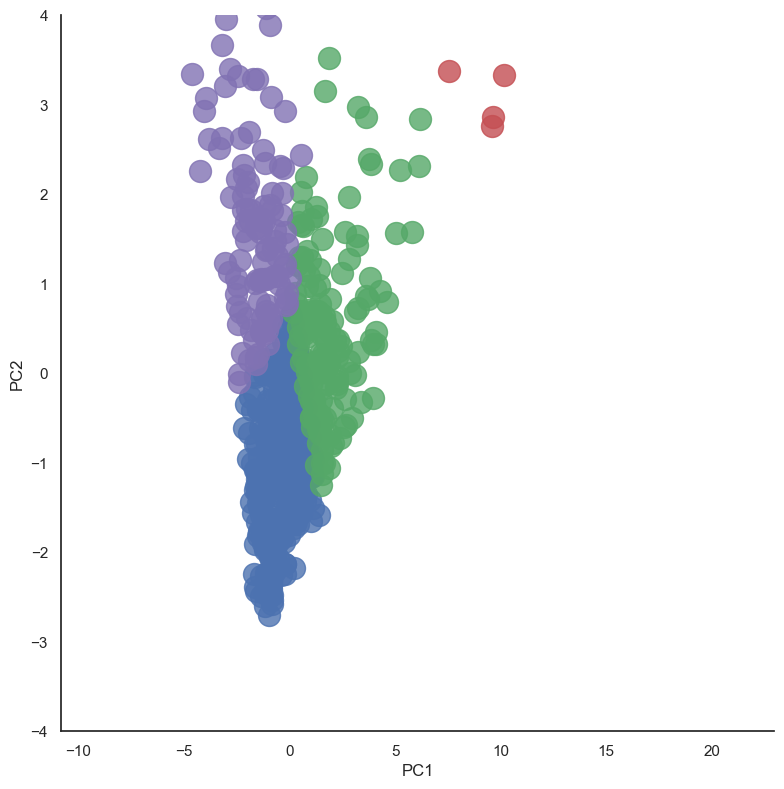

In [17]:
import seaborn as sns
sns.set(style='white')
ax = sns.lmplot(x='PC1', y='PC2', hue='Cluster', data=merged_df, legend=False,
                fit_reg=False, height=8, scatter_kws={"s": 250})
texts = []

ax.set(ylim=(-4, 4))
plt.show()

In [18]:
player_list = merged_df['Player'].tolist()
player_list

['Salis Abdul Samed',
 'Laurent Abergel',
 'Tyler Adams',
 'Yacine Adli',
 'Jean-Eudes Aholou',
 'Paul Akouokou',
 'Jean-Daniel Akpa-Akpro',
 'TomÃ¡s AlarcÃ³n',
 'Luis Alberto',
 'Marc Albrighton',
 'Thiago AlcÃ¡ntara',
 'Carles AleÃ±Ã¡',
 'Allan',
 'Dele Alli',
 'Miguel AlmirÃ³n',
 'Steven Alzate',
 'Benjamin AndrÃ©',
 'Robert Andrich',
 'Houssem Aouar',
 'Mauro Arambarri',
 'Charles ArÃ¡nguiz',
 'Maximilian Arnold',
 'Tolgay Arslan',
 'Santiago AscacÃ\xadbar',
 'Marco Asensio',
 'Kristoffer Askildsen',
 'Iddrisu Baba',
 'Milan Badelj',
 'Leon Bailey',
 'Nedim Bajrami',
 'Jonathan Bamba',
 'Filippo Bandinelli',
 'Enis Bardhi',
 'Keidi Bare',
 'NicolÃ² Barella',
 'Kike Barja',
 'Leandro Barreiro Martins',
 'Ander Barrenetxea',
 'Toma BaÅ¡iÄ\x87',
 'Amine Bassi',
 'Simone Bastoni',
 'Rodrigo Battaglia',
 'Julian Baumgartlinger',
 'Haris Belkebla',
 'Jean-Ricner Bellegarde',
 'Jude Bellingham',
 'Fran BeltrÃ¡n',
 'Marco Benassi',
 'LÃ¡szlÃ³ BÃ©nes',
 'IsmaÃ«l Bennacer',
 'Rodrigo Bentanc

In [19]:
merged_df.shape

(605, 32)

In [20]:
cluster_counts = merged_df['Cluster'].value_counts()
cluster_counts

0    332
2    151
4    108
1      8
3      6
Name: Cluster, dtype: int64


# Mason Mount 

In [21]:
mm = merged_df[merged_df['Player'] == 'Mason Mount']
mm

,PC1,PC2,Rk,Player,Nation,Pos,Pos 1,Squad,Comp,Age,...,GCA90,Tkl/90,TklW/90,Tmid3/90,Tattm/90,Passb/90,TklInt/90,Attpen/90,Pro/90,Cluster
388,-2.19562,1.974882,1203.0,Mason Mount,g ENG,MF,FW,Chelsea,Premier,22.0,...,1.03,1.03,0.69,0.00,0.69,0.34,2.41,4.48,0.00,4


In [22]:
mason_cluster = merged_df[merged_df['Cluster'] == 4]
mason_cluster = mason_cluster[mason_cluster['xA'] > 0.5]
mason_cluster


,PC1,PC2,Rk,Player,Nation,Pos,Pos 1,Squad,Comp,Age,...,GCA90,Tkl/90,TklW/90,Tmid3/90,Tattm/90,Passb/90,TklInt/90,Attpen/90,Pro/90,Cluster
8,-1.928059,2.687662,39.0,Luis Alberto,ESP,MF,0,Lazio,Serie,28.0,...,2.00,1.33,1.33,0.00,0.67,2.00,2.67,0.67,0.00,4
18,-1.746663,3.279904,72.0,Houssem Aouar,FRA,MF,0,Lyon,Ligue,23.0,...,0.25,1.75,1.00,0.75,1.00,1.25,3.50,4.75,0.75,4
30,-0.754452,1.089995,117.0,Jonathan Bamba,FRA,MF,0,Lille,Ligue,25.0,...,0.00,1.43,1.07,1.07,0.00,2.50,3.57,4.64,1.07,4
55,-1.323774,1.724550,187.0,Jason Berthomier,FRA,MF,0,Clermont Foot,Ligue,31.0,...,0.33,1.33,1.33,1.00,0.33,0.33,2.33,4.00,1.00,4
65,-0.381210,2.008793,213.0,Hicham Boudaoui,ALG,MF,0,Nice,Ligue,21.0,...,1.79,3.53,1.18,1.18,0.00,2.35,5.29,2.35,1.18,4
66,-2.160120,2.217181,215.0,Sofiane Boufal,MAR,MF,FW,Angers,Ligue,27.0,...,0.00,1.29,0.97,0.32,0.65,1.29,1.61,3.55,0.32,4
79,-2.082917,2.072217,262.0,Hakan ÃalhanoÄlu,TUR,MF,0,Inter,Serie,27.0,...,1.11,1.67,1.11,0.00,0.56,0.00,2.78,2.78,0.00,4
127,-2.372873,1.266407,401.0,Rodrigo De Paul,ARG,MF,0,AtlÃ©tico Madrid,La,27.0,...,0.83,0.00,0.00,0.00,0.00,3.33,0.83,0.83,0.00,4
133,-0.210343,1.219893,417.0,Kerem Demirbay,GER,MF,0,Leverkusen,Bundesliga,28.0,...,0.72,2.86,1.79,1.07,0.36,0.71,4.29,2.14,1.07,4
172,-1.815452,1.824651,531.0,Romain Faivre,FRA,MF,0,Brest,Ligue,23.0,...,0.67,1.00,1.00,0.67,0.00,0.33,2.00,2.00,0.67,4


# Mason Mount and U23 Profile

In [23]:
u23 = mason_cluster[mason_cluster['Age'] < 23]

In [24]:
u23

,PC1,PC2,Rk,Player,Nation,Pos,Pos 1,Squad,Comp,Age,...,GCA90,Tkl/90,TklW/90,Tmid3/90,Tattm/90,Passb/90,TklInt/90,Attpen/90,Pro/90,Cluster
65,-0.381210,2.008793,213.0,Hicham Boudaoui,ALG,MF,0,Nice,Ligue,21.0,...,1.79,3.53,1.18,1.18,0.00,2.35,5.29,2.35,1.18,4
290,-1.173916,2.347781,883.0,Justin Kluivert,NED,MF,0,Nice,Ligue,22.0,...,0.49,2.86,0.00,0.95,1.43,0.00,4.29,3.33,0.95,4
314,-1.129140,0.693825,976.0,Jesper LindstrÃ¸m,DEN,MF,FW,Eint Frankfurt,Bundesliga,21.0,...,0.00,1.30,0.43,0.87,0.00,2.61,2.61,4.78,0.87,4
388,-2.195620,1.974882,1203.0,Mason Mount,g ENG,MF,FW,Chelsea,Premier,22.0,...,1.03,1.03,0.69,0.00,0.69,0.34,2.41,4.48,0.00,4
446,-1.595355,1.626479,1377.0,Yeremi Pino,ESP,MF,0,Villarreal,La,18.0,...,2.40,1.76,0.59,0.00,0.59,2.35,2.35,4.12,0.00,4
466,-3.192184,3.667719,1432.0,Gio Reyna,USA,MF,0,Dortmund,Bundesliga,18.0,...,1.24,0.83,0.00,0.42,0.00,1.25,2.08,7.92,0.42,4


In [25]:
selected_columns = ['Player', 'Squad', 'npxG', 'xA', 'PrgDist/90', 'TB/90',
 'SW/90', 'SCA90','GCA90','Attpen/90', 'Pro/90', 'Passb/90']
u23 = u23[selected_columns]
u23


,Player,Squad,npxG,xA,PrgDist/90,TB/90,SW/90,SCA90,GCA90,Attpen/90,Pro/90,Passb/90
65,Hicham Boudaoui,Nice,0.2,0.6,70.00,0.00,0.00,2.38,1.79,2.35,1.18,2.35
290,Justin Kluivert,Nice,0.8,0.6,107.62,0.00,0.95,4.38,0.49,3.33,0.95,0.00
314,Jesper LindstrÃ¸m,Eint Frankfurt,0.3,0.9,62.61,0.00,0.87,3.97,0.00,4.78,0.87,2.61
388,Mason Mount,Chelsea,0.8,0.9,182.07,0.34,0.69,4.48,1.03,4.48,0.00,0.34
446,Yeremi Pino,Villarreal,0.2,0.6,90.00,0.00,0.59,2.40,2.40,4.12,0.00,2.35
466,Gio Reyna,Dortmund,1.0,1.2,183.33,0.42,1.67,5.78,1.24,7.92,0.42,1.25


In [26]:
Mason_values = u23[u23['Player'] == 'Mason Mount']
other_values = u23[u23['Player'] == 'Yeremi Pino']


start_column_index = 2  
mvalues = Mason_values.iloc[:, start_column_index:]
ovalues = other_values.iloc[:, start_column_index:]
mvalues = mvalues.astype(float)
ovalues = ovalues.astype(float)
ovalues

,npxG,xA,PrgDist/90,TB/90,SW/90,SCA90,GCA90,Attpen/90,Pro/90,Passb/90
446,0.2,0.6,90.0,0.0,0.59,2.4,2.4,4.12,0.0,2.35


In [27]:
mvalues = [0.8, 0.9, 182.07, 0.34, 0.69, 4.48, 1.03, 4.48, 0.0, 0.34]
ovalues= [0.2, 0.6, 90.0, 0.0, 0.59, 2.4, 2.4, 4.12, 0.0, 2.35]
mvalues

[0.8, 0.9, 182.07, 0.34, 0.69, 4.48, 1.03, 4.48, 0.0, 0.34]

# Radar Chart 

In [28]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

In [29]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [69]:
params = ['npxG', 'xA', 'PrgDist/90', 'TB/90',
 'SW/90', 'SCA90','GCA90','Attpen/90', 'Pro/90', 'Passb/90']

low =  [0.1, 0.1, 50, 0, 0,  1.5, 0, 2.0, 0, 0]
high = [1.0, 2, 200, 0.4, 2.0, 6.5, 3.5, 8.5, 1.5, 3]




In [31]:
radar = Radar(params, low, high,
              
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

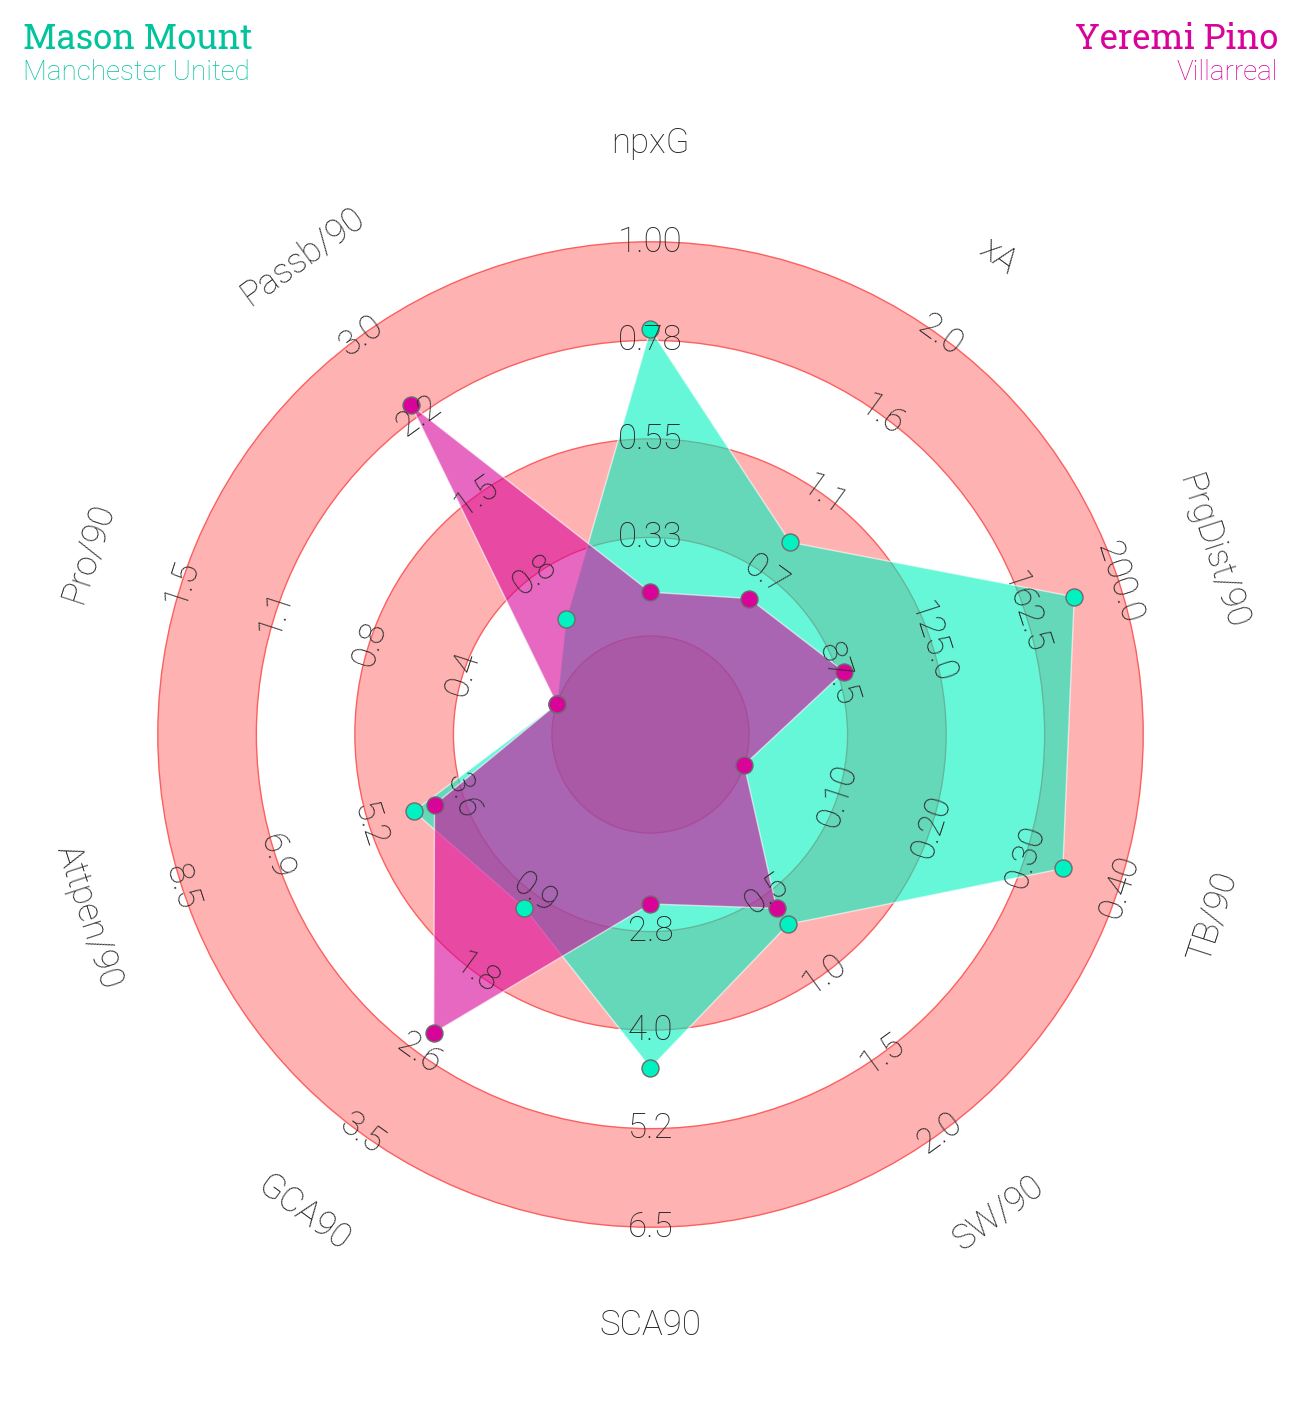

In [32]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(mvalues, ovalues, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)

title1_text = axs['title'].text(0.01, 0.65, 'Mason Mount', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Manchester United', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Yeremi Pino', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, 'Villarreal', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

# Best fit in Top 5 Leagues all Age

In [59]:
mason_cluster.columns.tolist()

['PC1',
 'PC2',
 'Rk',
 'Player',
 'Nation',
 'Pos',
 'Pos 1',
 'Squad',
 'Comp',
 'Age',
 'Born',
 'Gls',
 'Ast',
 'npxG',
 'xA',
 'Sh/90',
 'SoT/90',
 'Cmp%',
 'PrgDist/90',
 'TB/90',
 'SW/90',
 'SCA90',
 'GCA90',
 'Tkl/90',
 'TklW/90',
 'Tmid3/90',
 'Tattm/90',
 'Passb/90',
 'TklInt/90',
 'Attpen/90',
 'Pro/90',
 'Cluster']

In [60]:
selected_columns = ['Player', 'Squad', 'npxG', 'xA', 'PrgDist/90', 'TB/90',
 'SW/90', 'SCA90','GCA90','Attpen/90', 'Pro/90', 'Passb/90']
al = mason_cluster[selected_columns]
al

,Player,Squad,npxG,xA,PrgDist/90,TB/90,SW/90,SCA90,GCA90,Attpen/90,Pro/90,Passb/90
8,Luis Alberto,Lazio,0.1,0.8,427.33,0.67,2.67,4.67,2.00,0.67,0.00,2.00
18,Houssem Aouar,Lyon,1.3,1.5,201.50,0.25,0.75,3.75,0.25,4.75,0.75,1.25
30,Jonathan Bamba,Lille,0.7,0.6,213.93,0.00,2.86,4.25,0.00,4.64,1.07,2.50
55,Jason Berthomier,Clermont Foot,0.6,1.1,296.00,0.33,3.67,5.26,0.33,4.00,1.00,0.33
65,Hicham Boudaoui,Nice,0.2,0.6,70.00,0.00,0.00,2.38,1.79,2.35,1.18,2.35
66,Sofiane Boufal,Angers,1.5,0.6,230.00,0.00,1.94,3.54,0.00,3.55,0.32,1.29
79,Hakan ÃalhanoÄlu,Inter,0.2,0.9,290.56,0.00,6.11,6.11,1.11,2.78,0.00,0.00
127,Rodrigo De Paul,AtlÃ©tico Madrid,0.1,0.9,348.33,1.67,6.67,5.83,0.83,0.83,0.00,3.33
133,Kerem Demirbay,Leverkusen,0.2,0.6,281.43,0.36,3.93,4.30,0.72,2.14,1.07,0.71
172,Romain Faivre,Brest,0.4,0.9,169.00,0.67,3.33,4.67,0.67,2.00,0.67,0.33


In [99]:
Mason_values = al[al['Player'] == 'Mason Mount']
other_values = al[al['Player'] == 'RÄzvan Marin']


mvalues = Mason_values.iloc[:, 2:]
ovalues = other_values.iloc[:, 2:]
ovalues

,npxG,xA,PrgDist/90,TB/90,SW/90,SCA90,GCA90,Attpen/90,Pro/90,Passb/90
349,0.0,0.8,271.00,0.00,0.50,7.0,0.5,2.00,1.00,1.50


In [100]:
mvalues = [0.8, 0.9, 182.07, 0.34, 0.69, 4.48, 1.03, 4.48, 0.0, 0.34]
ovalues= [0.0, 0.8, 271.00, 0.00, 0.50, 7.0, 0.5, 2.00, 1.00, 1.50]
ovalues

[0.0, 0.8, 271.0, 0.0, 0.5, 7.0, 0.5, 2.0, 1.0, 1.5]

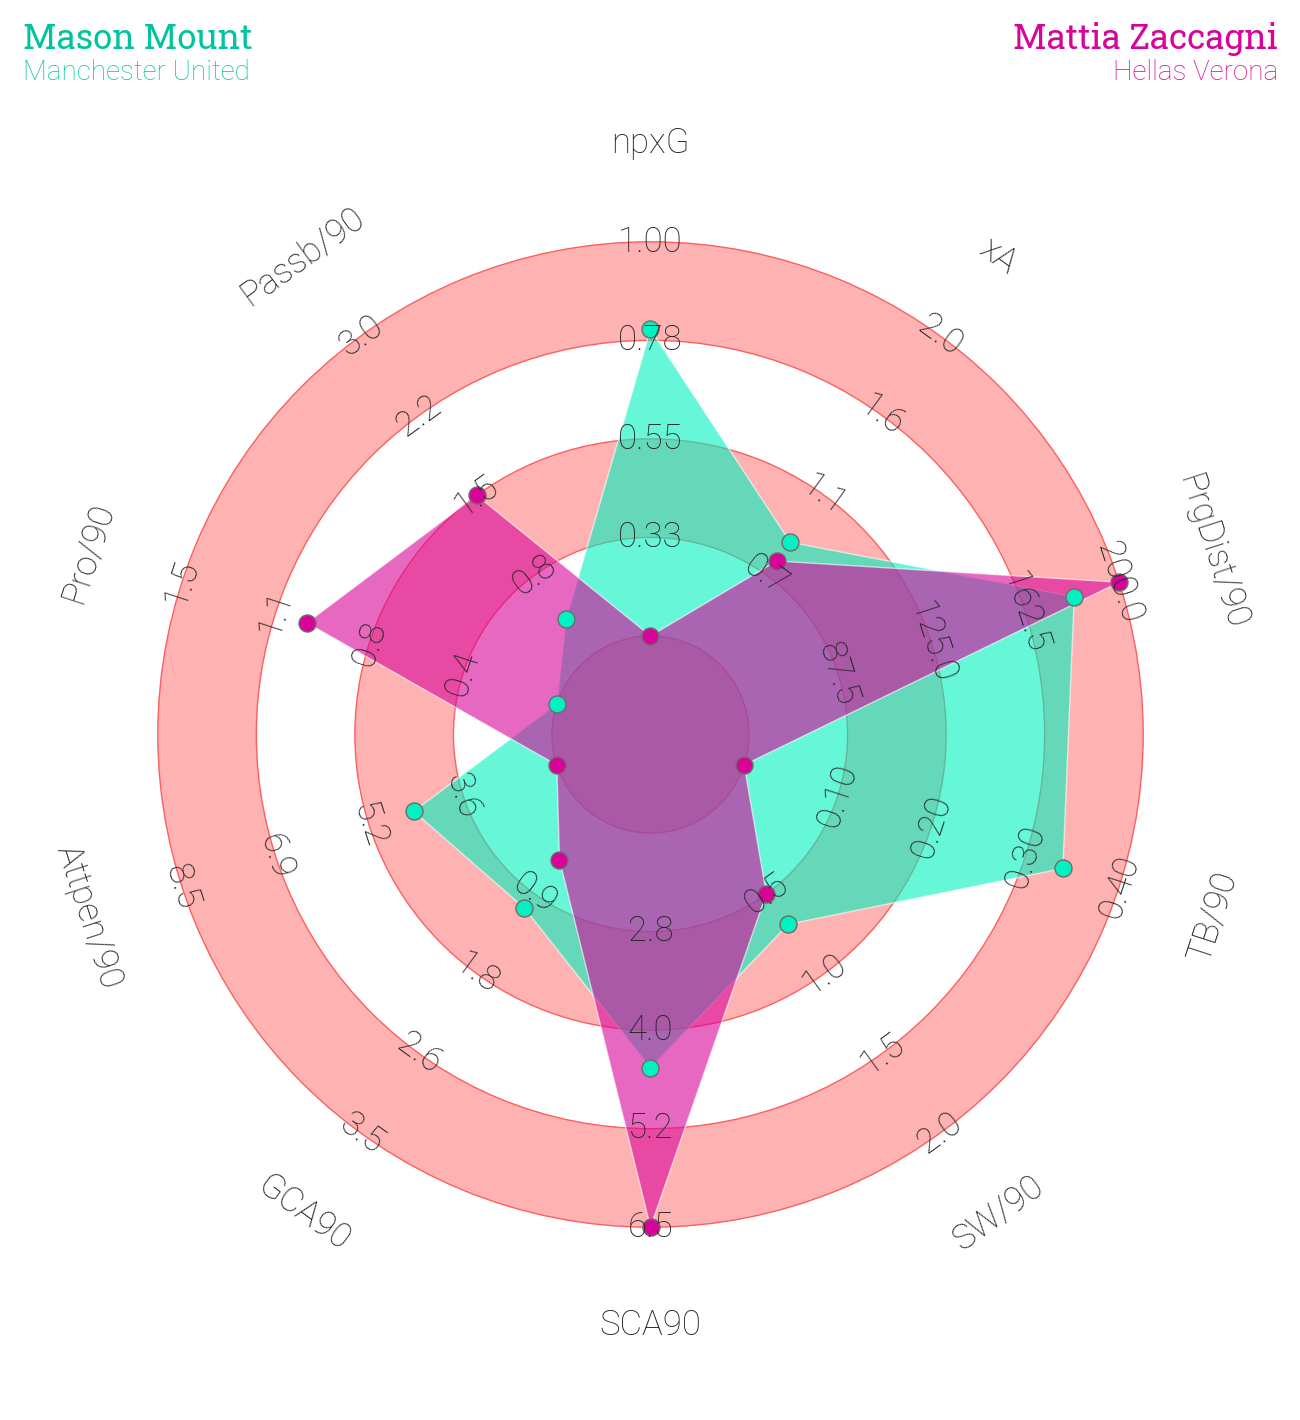

In [101]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(mvalues, ovalues, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)

title1_text = axs['title'].text(0.01, 0.65, 'Mason Mount', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Manchester United', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Mattia Zaccagni', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, 'Hellas Verona', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')